In [17]:
import pandas as pd
import numpy as np

baseline_df = pd.read_csv("results/gpt4/baseline.csv")
# follow_up_df = pd.read_csv("results/gpt4/follow_up.csv")
topic_df = pd.read_csv("results/gpt4/topic.csv")
persona_df = pd.read_csv("results/gpt4/persona.csv")
improve_df = pd.read_csv("results/gpt4/improve.csv")
# repeat_df = pd.read_csv("results/gpt4/repeat.csv")
important_parts_df = pd.read_csv("results/gpt4/important_parts.csv")
induction3_df = pd.read_csv("results/gpt3/instruction_induction.csv")
induction4_df = pd.read_csv("results/gpt4/instruction_induction.csv")


def get_avg_score(df, name):
    return np.mean(df[name])



#### Baseline

In [2]:
baseline_df.head()

,prompt_template,examples,num_examples,text,prompt,prediction,finish_reason,bert_score,rouge_1,rouge_2,rouge_L,slor,avg_error_count_score,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,config
0,"suggest three insightful, concise subheadings ...",[[]],0,Everyone needs a coach. It doesn't matter whet...,"Message(role='user', content='suggest three in...",The Importance of Feedback for Teachers\nTeach...,stop,0.222526,0.372340,0.064516,0.361702,3.115636,0.983051,0.0,0.000000,0,1,2,9,"{'model': 'gpt-4', 'suffix': '', 'temperature'..."
1,"suggest three insightful, concise subheadings ...",[[]],0,Everyone needs a coach. It doesn't matter whet...,"Message(role='user', content='suggest three in...",The Importance of Feedback for Teachers\nTeach...,stop,0.216725,0.352381,0.067308,0.314286,3.193556,0.993007,0.0,0.000000,0,1,2,9,"{'model': 'gpt-4', 'suffix': '', 'temperature'..."
2,"suggest three insightful, concise subheadings ...",[[]],0,Everyone needs a coach. It doesn't matter whet...,"Message(role='user', content='suggest three in...",Importance of Feedback for Teachers\nTeachers ...,stop,0.207104,0.358491,0.057143,0.320755,3.100689,0.986111,0.0,0.000000,0,1,1,9,"{'model': 'gpt-4', 'suffix': '', 'temperature'..."
3,"suggest three insightful, concise subheadings ...",[[]],0,Everyone needs a coach. It doesn't matter whet...,"Message(role='user', content='suggest three in...",The Importance of Feedback in Teaching:\n - T...,stop,0.203227,0.354839,0.032609,0.322581,2.975832,1.000000,0.0,0.083333,0,1,2,9,"{'model': 'gpt-4', 'suffix': '', 'temperature'..."
4,"suggest three insightful, concise subheadings ...",[[]],0,Everyone needs a coach. It doesn't matter whet...,"Message(role='user', content='suggest three in...",The Importance of Teacher Feedback\nTeachers r...,stop,0.216580,0.370370,0.053476,0.338624,3.183275,1.000000,0.0,0.000000,0,1,1,9,"{'model': 'gpt-4', 'suffix': '', 'temperature'..."


In [3]:
baseline_df.columns

Index(['prompt_template', 'examples', 'num_examples', 'text', 'prompt',
       'prediction', 'finish_reason', 'bert_score', 'rouge_1', 'rouge_2',
       'rouge_L', 'slor', 'avg_error_count_score', 'contradiction_ratio',
       'neutral_contradiction_ratio', 'number_hallucinations',
       'three_by_three', 'long_subheadings', 'long_bullets', 'config'],
      dtype='object')

In [4]:
print(baseline_df["prediction"][3])

The Importance of Feedback in Teaching:
  - Teachers receive little useful feedback to improve their performance
  - Current feedback system is not fair to teachers or students
  - Lack of feedback puts America's global leadership at risk
International Comparisons and Successful Systems:
  - U.S. ranks poorly in reading, science, and math proficiency
  - High-performing education systems often include formal teacher feedback systems
  - Shanghai, China is a top performer with a strong focus on teacher improvement
Implementing a Teacher Feedback and Improvement System:
  - Measures of Effective Teaching project shows value of video observations and student surveys
  - Support the growth of the teaching profession through self-reflection
  - Investment needed to build a complete feedback system, but benefits outweigh costs


In [5]:
baseline_df.describe()

,num_examples,bert_score,rouge_1,rouge_2,rouge_L,slor,avg_error_count_score,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.0,5.000000,5.0
mean,0.0,0.213232,0.361684,0.055010,0.331590,3.113798,0.992434,0.0,0.016667,0.0,1.0,1.600000,9.0
std,0.0,0.007865,0.009119,0.013696,0.019067,0.087175,0.007792,0.0,0.037268,0.0,0.0,0.547723,0.0
min,0.0,0.203227,0.352381,0.032609,0.314286,2.975832,0.983051,0.0,0.000000,0.0,1.0,1.000000,9.0
25%,0.0,0.207104,0.354839,0.053476,0.320755,3.100689,0.986111,0.0,0.000000,0.0,1.0,1.000000,9.0
50%,0.0,0.216580,0.358491,0.057143,0.322581,3.115636,0.993007,0.0,0.000000,0.0,1.0,2.000000,9.0
75%,0.0,0.216725,0.370370,0.064516,0.338624,3.183275,1.000000,0.0,0.000000,0.0,1.0,2.000000,9.0
max,0.0,0.222526,0.372340,0.067308,0.361702,3.193556,1.000000,0.0,0.083333,0.0,1.0,2.000000,9.0


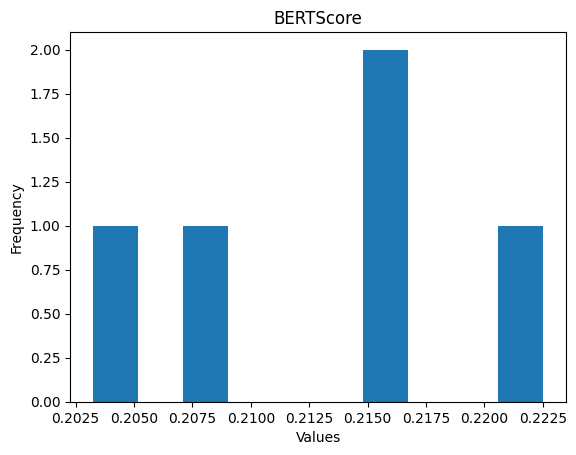

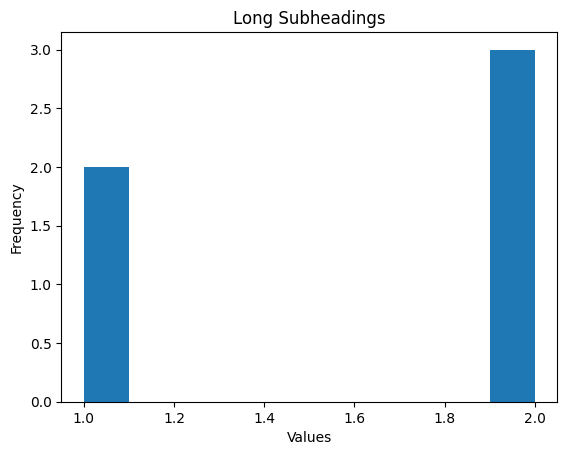

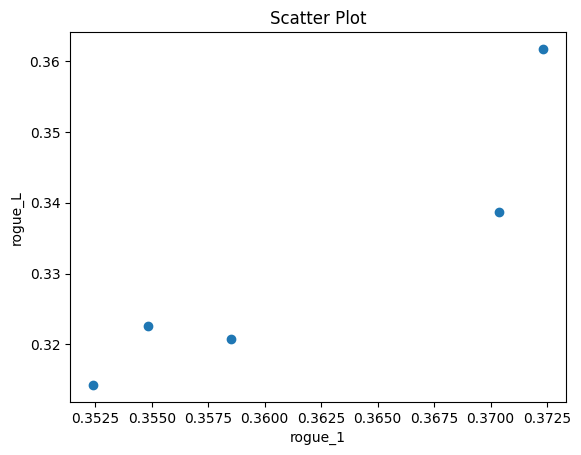

In [6]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(baseline_df["bert_score"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("BERTScore")
plt.show()

# Create a histogram of a numerical column
plt.hist(baseline_df["long_subheadings"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Long Subheadings")
plt.show()

# Create a scatter plot of two numerical columns
plt.scatter(baseline_df["rouge_1"], baseline_df["rouge_L"])
plt.xlabel("rouge_1")
plt.ylabel("rouge_L")
plt.title("Scatter Plot")
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_shared_column(dataframes, shared_column, dataframe_names):
    """
    Plot lines of a shared column for multiple DataFrames with identical columns.

    Parameters:
        dataframes (list): A list of DataFrames.
        shared_column (str): The name of the shared column.
    """
    # Plot lines of the shared column for each DataFrame
    for i, df in enumerate(dataframes):
        plt.plot(df[shared_column], label=f"{dataframe_names[i]}")

    # Add labels and title
    plt.xlabel("Example index")
    plt.ylabel(shared_column)
    plt.title(shared_column)

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

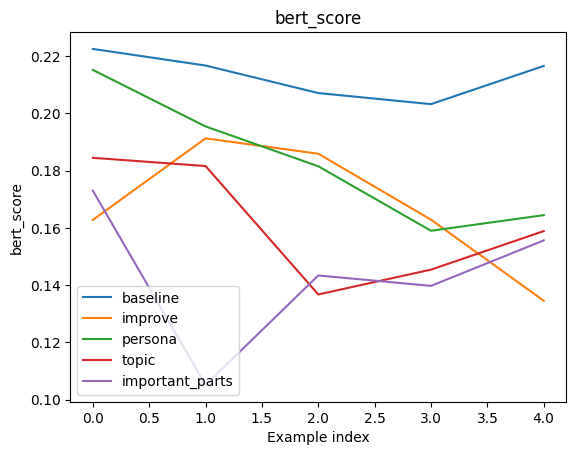

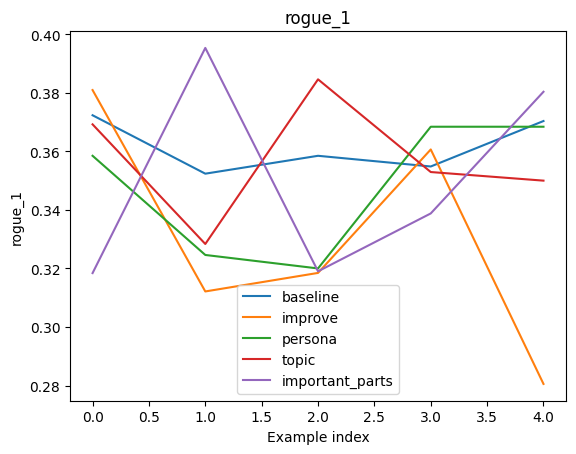

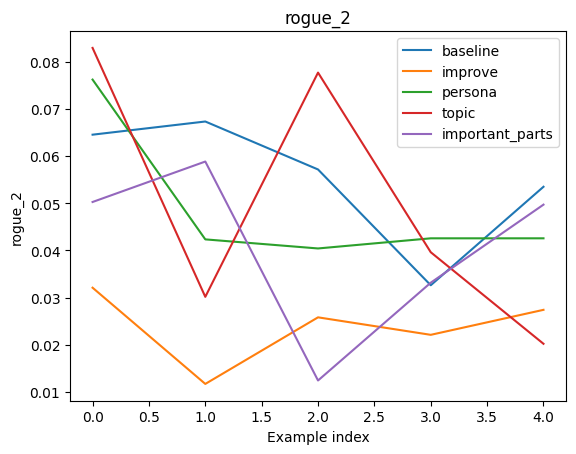

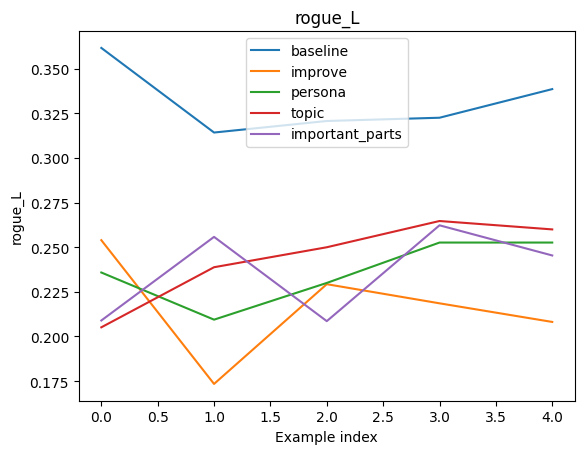

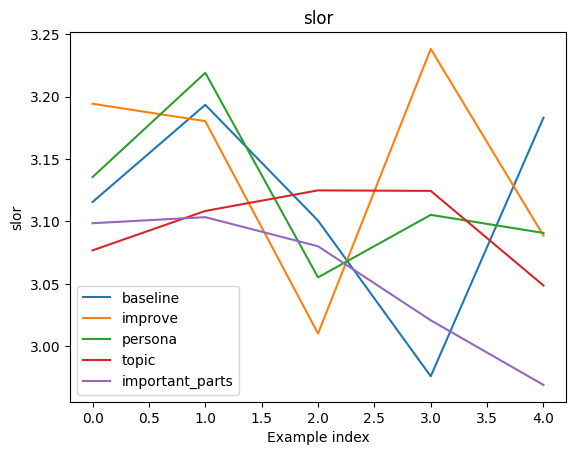

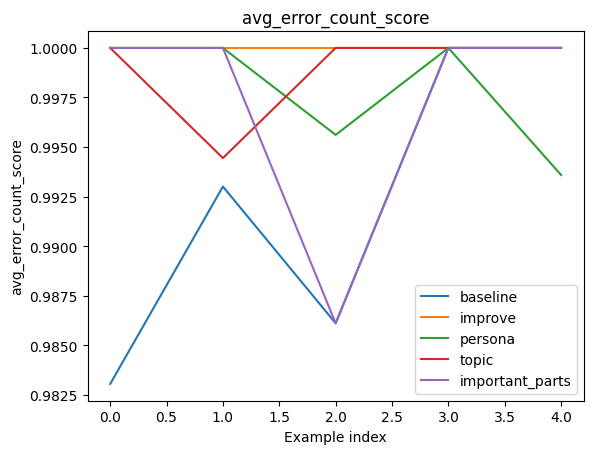

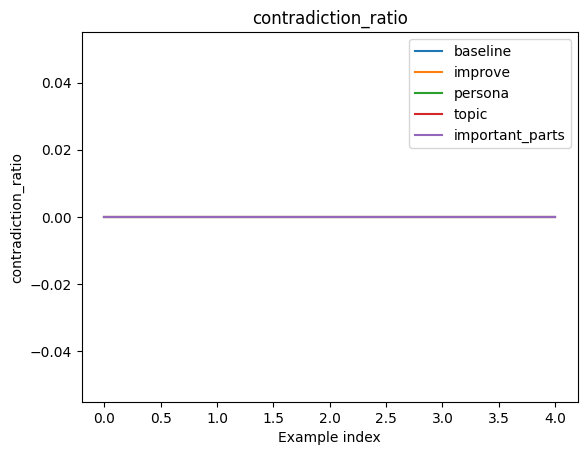

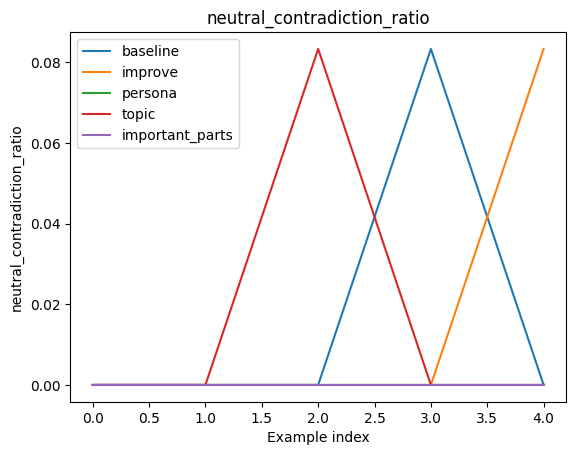

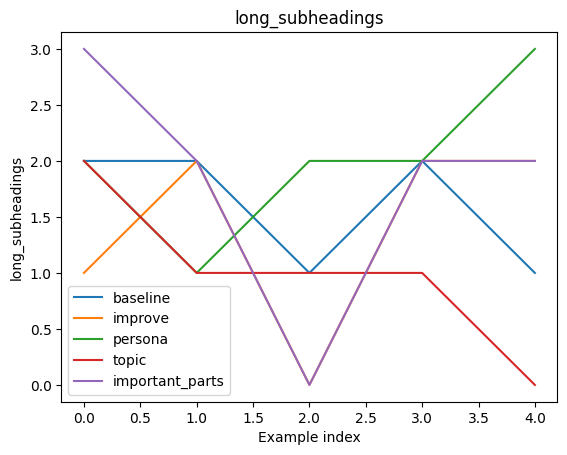

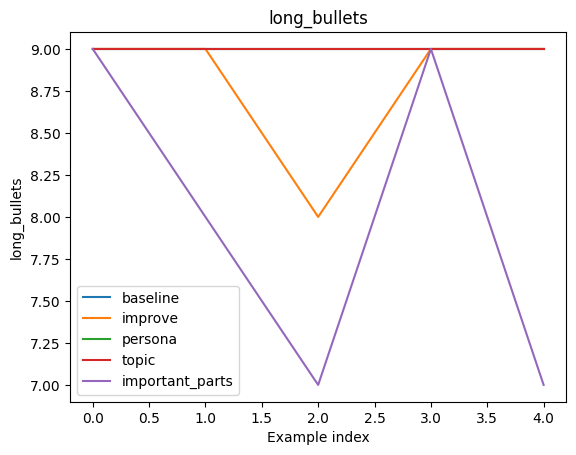

In [14]:
dataframes = [baseline_df, improve_df, persona_df, topic_df, important_parts_df.loc[0:4]]
dataframe_names = ["baseline", "improve", "persona", "topic", "important_parts"]
shared_columns = ["bert_score", "rouge_1","rouge_2","rouge_L", "slor", "avg_error_count_score", "contradiction_ratio", "neutral_contradiction_ratio", "long_subheadings", "long_bullets"]
# column_names = ["bert_score" for i in range(len(dataframes))]

for column_name in shared_columns:
    plot_shared_column(dataframes, column_name, dataframe_names)


In [21]:
for i in induction3_df.prediction:
    print(i)



Write a summary of the input.

The summary of the input is:

This speech by Bill Gates focuses on the importance of feedback in the teaching profession. He notes that in the US, 98% of teachers receive no feedback, leading to low academic rankings, whereas places like Shanghai, China, which rank number one across the board, have a formal system for helping teachers improve. Gates argues that teachers need access to video, peer reviews, and student surveys in order to improve. This system would require a large investment, but would have an immense impact, giving all teachers the support they need and deserve.
 Describe how buildings can be transformed into active players in the energy system.

Output: Conventional buildings are generally consumers of energy, built to be fast and cheap with high consumption of energy, reliance on fossil fuels, and high energy costs. By transforming these buildings into "prosumers" (producers + consumers), energy efficiency can be improved, electrificat

In [40]:
for index, row in induction4_df.iterrows():
    if row.num_examples == 8:
        row.prediction = row.prediction.replace("assistant: ", "")
        row.prediction = row.prediction.replace("\n----------\n", "")
        print(row.prediction)

Summarize the main ideas of the text in a concise and organized manner, highlighting key points and themes.
Summarize the main points of each text and organize them into clear, concise output statements.


AttributeError: 'float' object has no attribute 'replace'